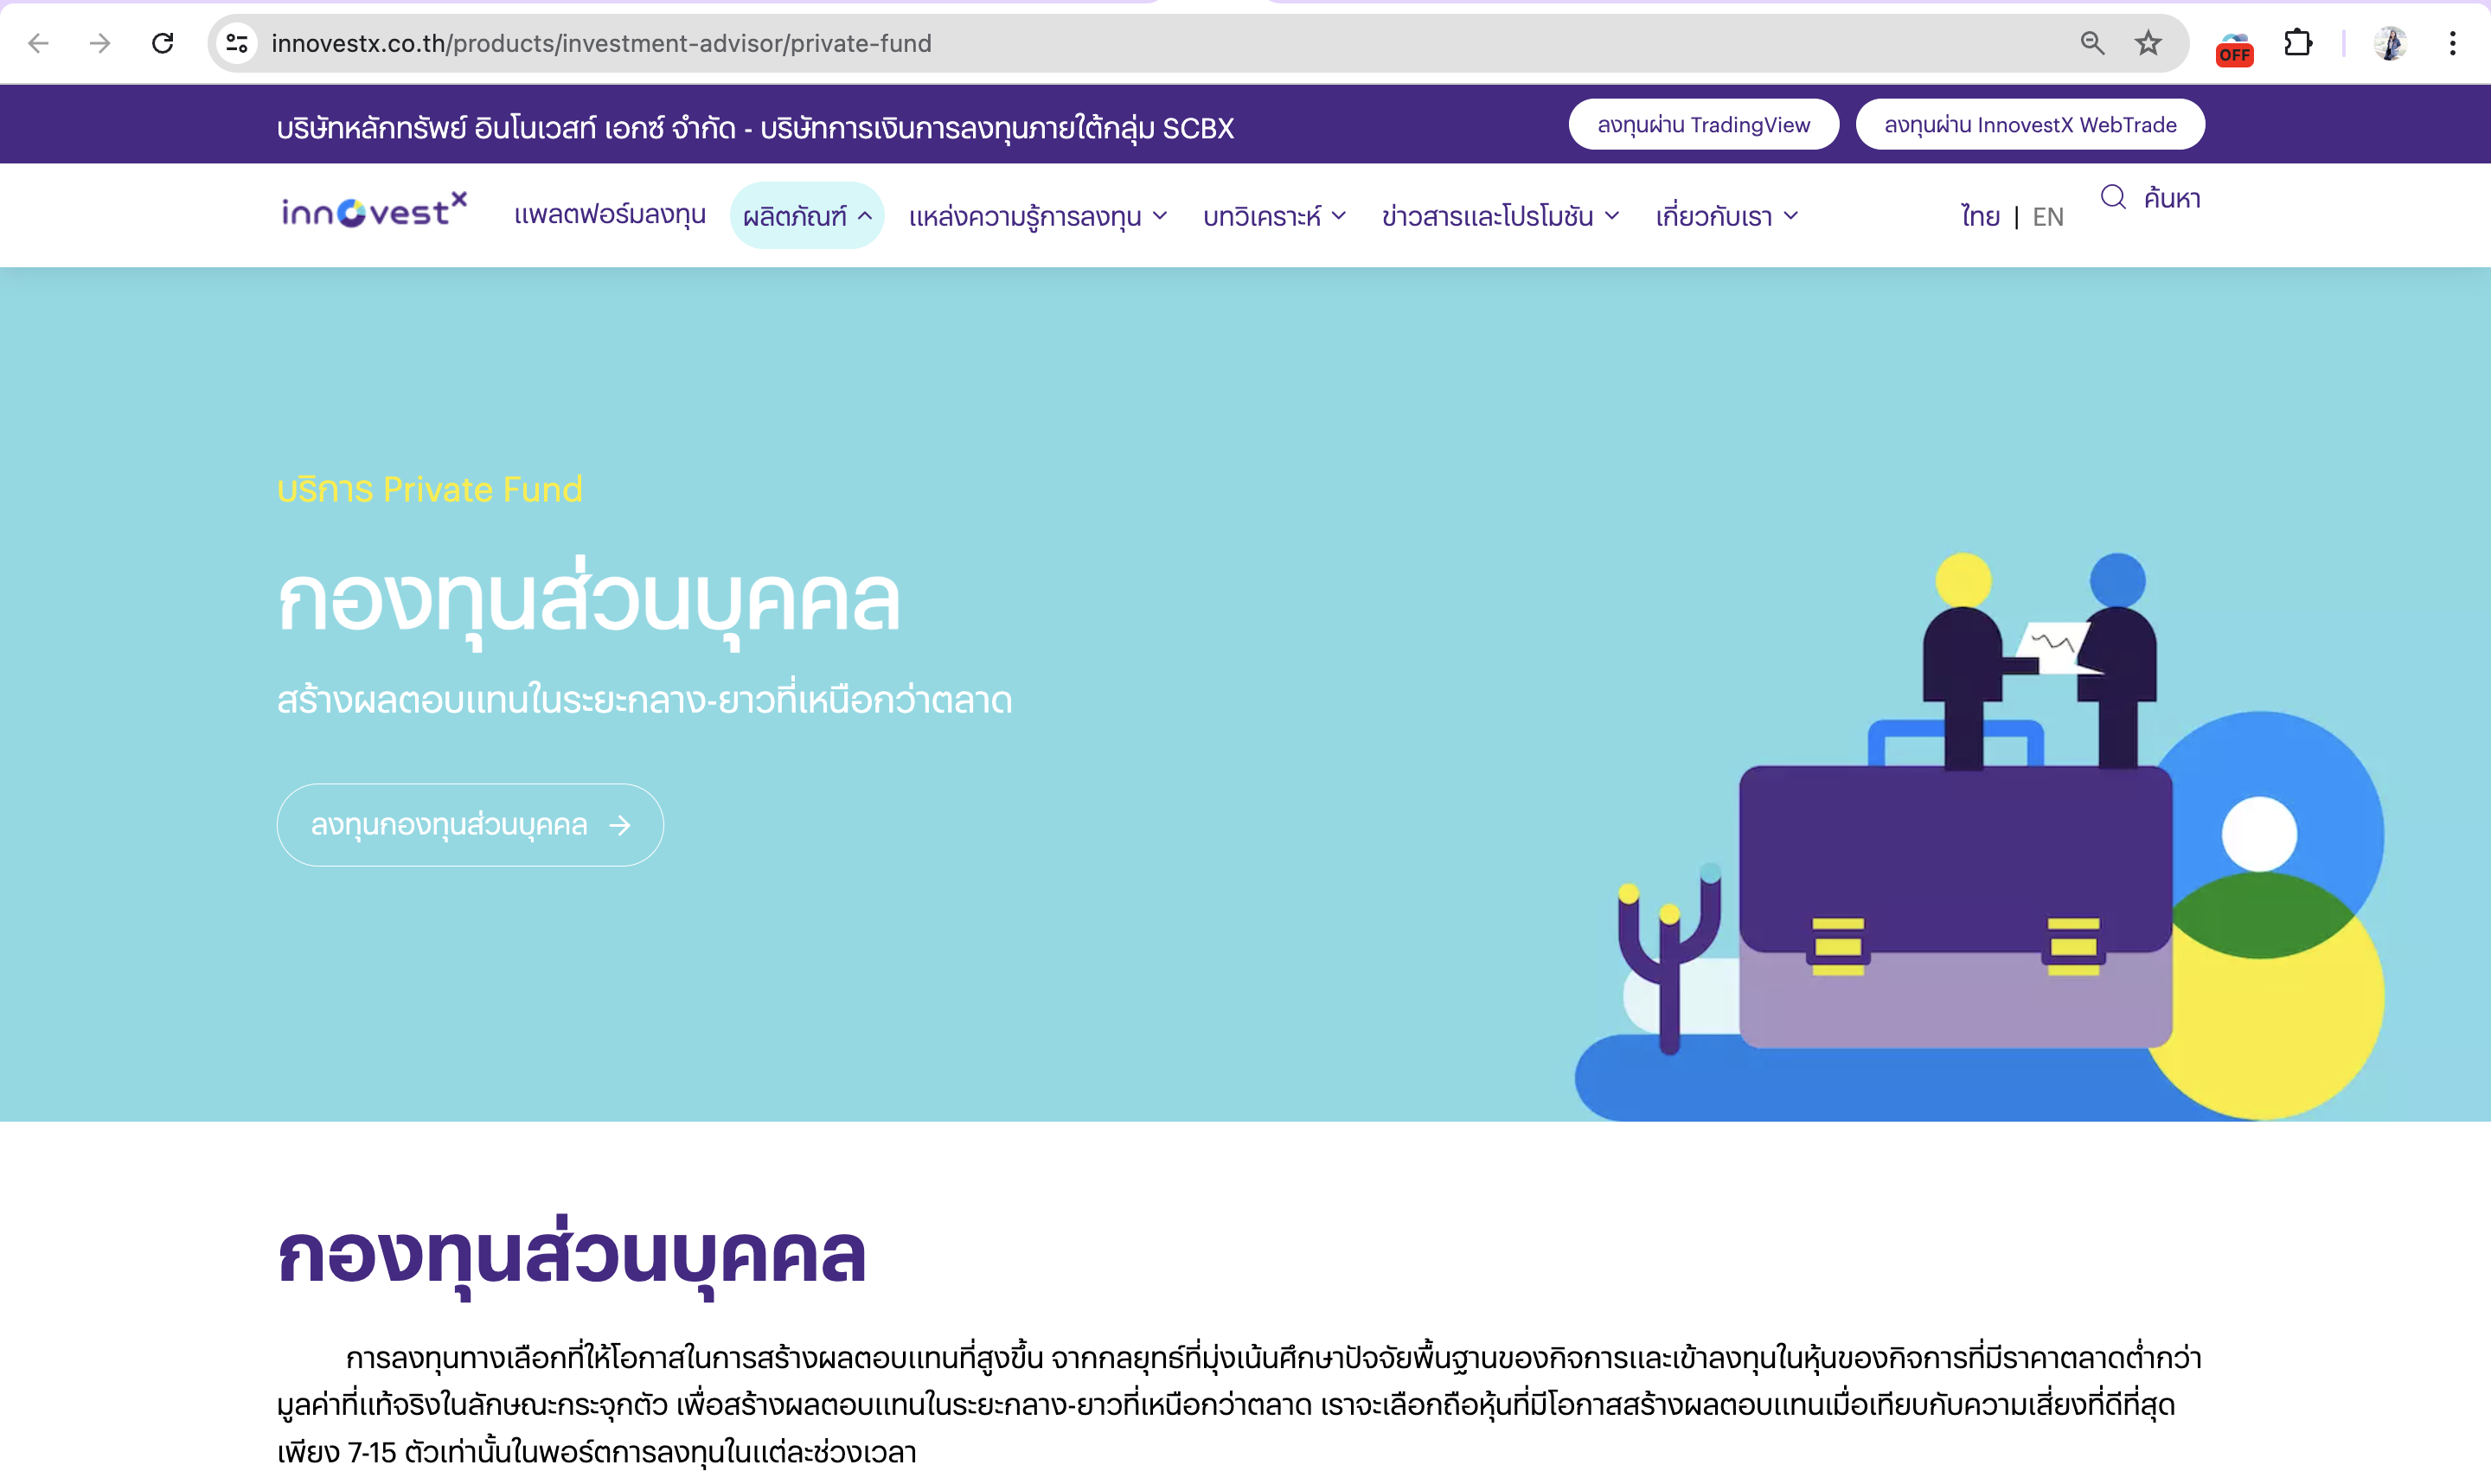

In [17]:
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import os

In [24]:
# Define the URL and headers
url = 'https://www.innovestx.co.th/products/investment-advisor/private-fund'
data_path = '/Users/bsaejia/Documents/2024_innovestx/innovestx-rag/data'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Fetch the page
response = requests.get(url, headers=headers)
page_html = response.content

# Parse the HTML content
data = soup(page_html, 'html.parser')

# Directory to save PDFs
pdf_dir = os.path.join(data_path, 'pdf')
os.makedirs(pdf_dir, exist_ok=True)

# Extract text and links
text_and_links = []
pdf_links = []
for element in data.find_all(['p', 'a', 'h2', 'h3']):
    if element.name == 'a':
        text = element.get_text(strip=True)
        link = element.get('href')
        if link:
            if not link.startswith('http'):
                link = 'https://www.innovestx.co.th' + link
            text_and_links.append(f'{text} {link}')
            if '.pdf' in link:
                pdf_links.append(link)
    else:
        text_and_links.append(element.get_text(strip=True))

# 1.Save the extracted text and links to a file
with open(os.path.join(data_path,'innovestx_pfa_landing.txt'), 'w', encoding='utf-8') as file:
    for item in text_and_links:
        file.write(item + '\n')

# 2.Download PDFs
for link in pdf_links:
    pdf_link = link.split('?')[0]
    print(pdf_link)
    pdf_response = requests.get(pdf_link)
    pdf_name = os.path.join(pdf_dir, 'innovestx_pfa_'+pdf_link.split('/')[-1])
    with open(pdf_name, 'wb') as pdf_file:
        pdf_file.write(pdf_response.content)
    print(f'Downloaded: {pdf_name}')

https://www.innovestx.co.th/docs/default-source/product-pdf/private-fund/fund-fact-sheet/july-2024/202406-invx-th-alpha-fund-fact-sheet-(th)-june-2024.pdf
Downloaded: /Users/bsaejia/Documents/2024_innovestx/innovestx-rag/data/pdf/innovestx_pfa_202406-invx-th-alpha-fund-fact-sheet-(th)-june-2024.pdf
https://www.innovestx.co.th/docs/default-source/product-pdf/private-fund/fund-fact-sheet/july-2024/202406-invx-th-alpha-fund-fact-sheet-(en)-june-2024.pdf
Downloaded: /Users/bsaejia/Documents/2024_innovestx/innovestx-rag/data/pdf/innovestx_pfa_202406-invx-th-alpha-fund-fact-sheet-(en)-june-2024.pdf
https://www.innovestx.co.th/docs/default-source/product-pdf/private-fund/fund-fact-sheet/july-2024/202406-invx-vn-alpha-fund-fact-sheet-(th)-june-2024.pdf
Downloaded: /Users/bsaejia/Documents/2024_innovestx/innovestx-rag/data/pdf/innovestx_pfa_202406-invx-vn-alpha-fund-fact-sheet-(th)-june-2024.pdf
https://www.innovestx.co.th/docs/default-source/product-pdf/private-fund/fund-fact-sheet/july-2024/2